In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

In [2]:
df_sales=pd.read_csv('sales_data.csv',parse_dates=['Date'])
df_sales.head()

,Order_ID,Quantity,Item_Name,Choice_Description,store,Item_Price,Date,Sale Announced
0,1,3,Chips and Fresh Tomato Salsa,NaN,1,2.39,2019-01-30,YES
1,1,3,Izze,[Clementine],1,3.39,2018-12-27,NO
2,1,1,Nantucket Nectar,[Apple],1,3.39,2018-12-11,NO
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,1,2.39,2019-03-06,YES
4,2,4,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",1,16.98,2019-02-13,NO


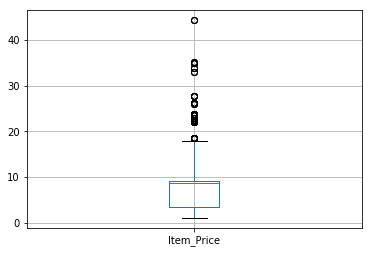

In [5]:
df_sales.boxplot(column='Item_Price')

In [3]:
df_sales['Item_Name'].unique

<bound method Series.unique of 0                 Chips and Fresh Tomato Salsa
1                                         Izze
2                             Nantucket Nectar
3        Chips and Tomatillo-Green Chili Salsa
4                                 Chicken Bowl
5                                 Chicken Bowl
6                                Side of Chips
7                                Steak Burrito
8                             Steak Soft Tacos
9                                Steak Burrito
10                         Chips and Guacamole
11                        Chicken Crispy Tacos
12                          Chicken Soft Tacos
13                                Chicken Bowl
14                         Chips and Guacamole
15       Chips and Tomatillo-Green Chili Salsa
16                             Chicken Burrito
17                             Chicken Burrito
18                                 Canned Soda
19                                Chicken Bowl
20                         Ch

In [4]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_x=LabelEncoder()
df_sales.iloc[:,2]=labelencoder_x.fit_transform(df_sales.iloc[:,2])
df_sales.head()

,Order_ID,Quantity,Item_Name,Choice_Description,store,Item_Price,Date,Sale Announced
0,1,3,24,NaN,1,2.39,2019-01-30,YES
1,1,3,31,[Clementine],1,3.39,2018-12-27,NO
2,1,1,32,[Apple],1,3.39,2018-12-11,NO
3,1,1,28,NaN,1,2.39,2019-03-06,YES
4,2,4,17,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",1,16.98,2019-02-13,NO


In [5]:
df=df_sales.drop(['Choice_Description','Sale Announced','Item_Price','Order_ID'],axis=1)
df.head()

,Quantity,Item_Name,store,Date
0,3,24,1,2019-01-30
1,3,31,1,2018-12-27
2,1,32,1,2018-12-11
3,1,28,1,2019-03-06
4,4,17,1,2019-02-13


In [7]:
df.describe()

,Quantity,Item_Name,store
count,13239.000000,13239.000000,13239.00000
mean,2.799758,21.655034,1.95264
std,1.053134,10.546724,0.80541
min,1.000000,0.000000,1.00000
25%,2.000000,17.000000,1.00000
50%,3.000000,19.000000,2.00000
75%,3.000000,28.000000,3.00000
max,5.000000,46.000000,3.00000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FFF6A2F4A8>]],
      dtype=object)

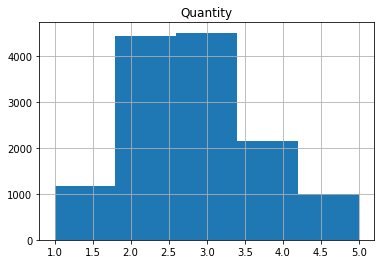

In [8]:
df.hist('Quantity',bins=5)

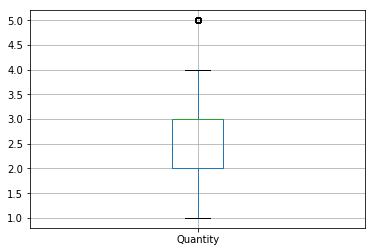

In [9]:
df.boxplot(column='Quantity')

In [10]:
df['Date']=pd.to_datetime(df['Date'])

In [11]:
df['year'] = pd.DatetimeIndex(df['Date']).year

In [12]:
df['month'] = pd.DatetimeIndex(df['Date']).month

In [13]:
df['day'] = pd.DatetimeIndex(df['Date']).day

In [14]:
df['dayofyear'] = df.Date.apply(lambda x: x.dayofyear)

In [15]:
df['dayofweek'] = df.Date.apply(lambda x: x.dayofweek)

In [16]:
df=df.drop(['Date'], axis=1)

In [17]:
df

,Quantity,Item_Name,store,year,month,day,dayofyear,dayofweek
0,3,24,1,2019,1,30,30,2
1,3,31,1,2018,12,27,361,3
2,1,32,1,2018,12,11,345,1
3,1,28,1,2019,3,6,65,2
4,4,17,1,2019,2,13,44,2
5,3,17,1,2019,2,28,59,3
6,4,34,1,2018,12,18,352,1
7,3,36,1,2019,2,10,41,6
8,1,40,1,2019,1,31,31,3
9,3,36,1,2019,1,8,8,1


In [18]:
# Add feature, average sales pr. day
df['daily_avg']=df.groupby(['Item_Name','dayofweek'])['Quantity'].transform('mean')

In [19]:
# Add feature, average sales pr. month
df['month_avg']=df.groupby(['Item_Name','month'])['Quantity'].transform('mean')

In [20]:
# Adding rolling mean feature to a data
df['rolling_mean'] = df.groupby(['Item_Name'])['Quantity'].rolling(30).mean().reset_index(0,drop=True)


In [21]:
df.head()

,Quantity,Item_Name,store,year,month,day,dayofyear,dayofweek,daily_avg,month_avg,rolling_mean
0,3,24,1,2019,1,30,30,2,2.846154,2.766990,NaN
1,3,31,1,2018,12,27,361,3,2.944444,2.600000,NaN
2,1,32,1,2018,12,11,345,1,2.571429,2.608696,NaN
3,1,28,1,2019,3,6,65,2,2.541667,2.500000,NaN
4,4,17,1,2019,2,13,44,2,2.867550,2.805447,NaN


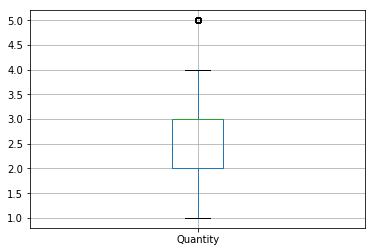

In [22]:
df.boxplot(column='Quantity')

In [23]:
correlation=df.corr(method ='pearson')

In [24]:
correlation.style.background_gradient(cmap='coolwarm')

,Quantity,Item_Name,store,year,month,day,dayofyear,dayofweek,daily_avg,month_avg,rolling_mean
Quantity,1,0.00553263,0.380054,0.00273766,-0.00574391,0.00352786,-0.00545693,0.00258529,0.136828,0.105525,0.453633
Item_Name,0.00553263,1,0.00471062,0.0179004,-0.0167045,0.0167705,-0.0155937,0.0136046,0.0404348,0.0524297,0.0109913
store,0.380054,0.00471062,1,-0.000513718,0.000199835,0.0017367,0.00030431,-0.00154161,0.00273514,0.00532953,0.762625
year,0.00273766,0.0179004,-0.000513718,1,-0.990905,-0.101111,-0.991631,-0.0147351,0.0314945,0.0259433,0.000581901
month,-0.00574391,-0.0167045,0.000199835,-0.990905,1,0.0650393,0.998132,0.0154795,-0.031976,-0.0544319,-0.000243808
day,0.00352786,0.0167705,0.0017367,-0.101111,0.0650393,1,0.12569,-0.0396593,0.00441284,0.0549456,-0.00422671
dayofyear,-0.00545693,-0.0155937,0.00030431,-0.991631,0.998132,0.12569,1,0.0130637,-0.031593,-0.0504261,-0.000528436
dayofweek,0.00258529,0.0136046,-0.00154161,-0.0147351,0.0154795,-0.0396593,0.0130637,1,0.0188944,0.00803362,-0.00508836
daily_avg,0.136828,0.0404348,0.00273514,0.0314945,-0.031976,0.00441284,-0.031593,0.0188944,1,0.299305,0.0333624
month_avg,0.105525,0.0524297,0.00532953,0.0259433,-0.0544319,0.0549456,-0.0504261,0.00803362,0.299305,1,0.0372279


In [25]:
df[:] = np.nan_to_num(df)

In [26]:
y=df['Quantity']

In [27]:
x=df.drop(['Quantity'], axis=1)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.6,random_state=0)

## Random forest regression

In [29]:
n_estimators=100
# Fit regression model
# Estimate the score on the entire dataset, with no missing values
model = RandomForestRegressor(random_state=0, n_estimators=n_estimators)
model.fit(x_train, y_train)
model_score = model.score(x_train, y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print(" coefficient of determination R^2 of the prediction.: ",model_score)
y_predicted = model.predict(x_test)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))

 coefficient of determination R^2 of the prediction.:  0.8609868502615317
Mean squared error: 0.99
Test Variance score: 0.11


### Decision tree